In [364]:
import glob
import pandas as pd
import tesserocr
from PIL import Image, ImageOps
from random import randint
from tqdm import tqdm


In [365]:
def grayscale(image):
    """Converts the image to grayscale."""
    return image.convert('L')


def threshold(image, threshold=127):
    """Applies a thresholding filter to the image."""
    return image.point(lambda x: 0 if x < threshold else 255)


def crop_image(image, crop_percentage_height=0.3, crop_percentage_width=0.1):
    width, height = image.size
    crop_height = int(height * crop_percentage_height)
    crop_width = int(width * crop_percentage_width)
    # Crop the image to the lower part
    return image.crop((crop_width, height - crop_height, width - crop_width, height))


def preprocess_image(image):
    image = crop_image(image)

    image = threshold(image, 220)

    image = grayscale(image)

    image = ImageOps.invert(image)

    return image



In [366]:
def detect_hebrew_subtitles(image, api):
    api.SetVariable("tessedit_char_whitelist", 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyzאבגדהוזחטיכלמנסעפצקרשתץףךןם !-?.0123456789*"')
    api.SetImage(image)

    text = api.GetUTF8Text()

    return text.strip(), api.AllWordConfidences()

In [367]:
directory = 'D:\\memes\\'
files = glob.glob(directory + '**/*.jpg', recursive=True) + glob.glob(directory + '**/*.png', recursive=True) + glob.glob(directory + '**/*.jpeg', recursive=True)
api = tesserocr.PyTessBaseAPI(path=r".\tessdata-main", lang="heb_kan11", psm=tesserocr.PSM.SINGLE_BLOCK)

In [369]:
data = []

for f in tqdm(files):
    image = Image.open(f)
    aspect_ratio = image.size[0] / image.size[1]
    image = preprocess_image(image)
    text, confidence = detect_hebrew_subtitles(image, api)
    d = f.replace('D:\\', '').replace('\\', '/')
    data.append({
        'image_url': d,
        'text': text,
    #    'confidence': confidence,
        'series': d.replace('memes/', '').split('/')[:-1],
        'aspect_ratio': aspect_ratio
    })

100%|██████████| 7721/7721 [12:15<00:00, 10.49it/s] 


In [368]:
len(files)

7721

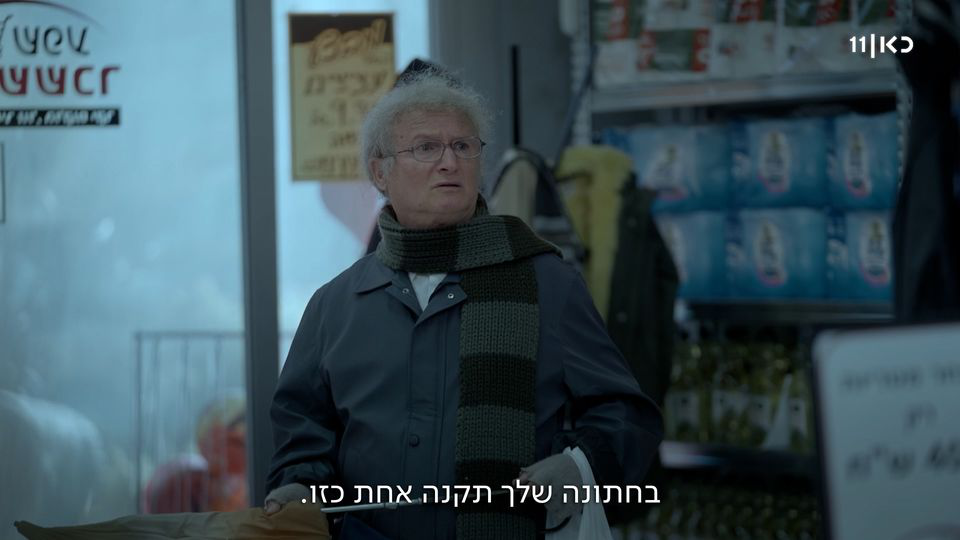

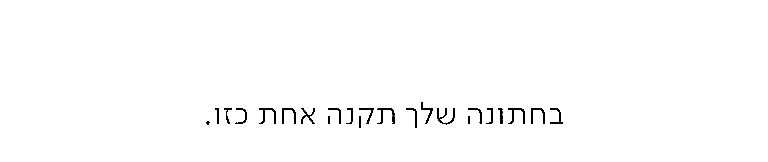

בחתונה שלך תקנה אחת כזו.


KeyError: 'confidence'

In [380]:
def display_image_and_text(idx):
    image = Image.open('D:/'+data[idx]["image_url"])
    pro_image = preprocess_image(image)
    display(image, pro_image)

    print(data[idx]["text"])
    print(data[idx]["confidence"])
   # print(pd.DataFrame({"Word": data[idx]['text'].split(), "Confidence Score": data[idx]["confidence"]}).to_string(index=False))

idx = randint(0, len(data))
display_image_and_text(idx)

In [288]:
data[1]

{'image_url': 'memes/היהודים באים/עונה 1/192785723_3055857084633797_1516435809277082119_n.jpg',
 'text': 'סליחה עכשיו אתה\nאומר שאני מטומטמת?',
 'series': ['היהודים באים', 'עונה 1']}

In [381]:
df = pd.DataFrame(data)
df.to_json('memes.json', orient='records')

In [306]:
from transformers import pipeline

image_to_text = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning", device='cuda')

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


AssertionError: Torch not compiled with CUDA enabled

In [310]:
import torch
torch.cuda.is_available()

False

In [308]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121


ERROR: Cannot uninstall 'TBB'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


  Attempting uninstall: tbb
    Found existing installation: TBB 0.2


In [305]:
image_to_text("https://searchmemes.s3.eu-west-2.amazonaws.com/memes/%D7%94%D7%9E%D7%A4%D7%A7%D7%93%D7%AA/%D7%A2%D7%95%D7%A0%D7%94%201%20%D7%A4%D7%A8%D7%A7%209/185538256_3039797549573084_208230307892523194_n.jpg")

C:\Users\motty\anaconda3\lib\site-packages\transformers\generation\utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': 'men in military uniforms standing on a beach '}]